In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato/Untitled.ipynb
/kaggle/input/zomato/zomato.csv
/kaggle/input/zomato/file5.json
/kaggle/input/zomato/file1.json
/kaggle/input/zomato/file2.json
/kaggle/input/zomato/file4.json
/kaggle/input/zomato/file3.json
/kaggle/input/zomato/Country-Code.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("/kaggle/input/zomato/zomato.csv", encoding='latin-1')
# encoding='latin-1' for Avoiding Error :  'utf-8' codec can't decode byte 0xed in position 7044: invalid continuation byte

In [4]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [5]:
len(df.columns)
len(df.index)
df.shape
# Length of Columns is 21
# Length of Index (Rows) is 9551

(9551, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df.describe() # Shows only numerical Features 

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Things to do
* Missing Values
* Explore about Numerical Values
* Explore about Categorical Values
* Finding Rela

In [8]:
df.isna().sum() #Sum of all missing values in Dataset
# OR 
#df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
[feature for feature in df.columns if df[feature].isnull().sum() > 1]

['Cuisines']

In [10]:
df_country = pd.read_excel('/kaggle/input/zomato/Country-Code.xlsx')

In [11]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [12]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [13]:
final_df = pd.merge(df, df_country, on= 'Country Code', how='left')

In [14]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [15]:
c = final_df.Country.value_counts() # Number of Different Records 

The above data shows that India is the main consumer of zomato, other countries like US, UK, UAE have very sparse resturaunts registered under zomato.
Canada has the least

* x = c.index
* y = c.values

In [16]:
c

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'India'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Brazil'),
  Text(4, 0, 'UAE'),
  Text(5, 0, 'South Africa'),
  Text(6, 0, 'New Zealand'),
  Text(7, 0, 'Turkey'),
  Text(8, 0, 'Australia'),
  Text(9, 0, 'Phillipines'),
  Text(10, 0, 'Indonesia'),
  Text(11, 0, 'Singapore'),
  Text(12, 0, 'Qatar'),
  Text(13, 0, 'Sri Lanka'),
  Text(14, 0, 'Canada')])

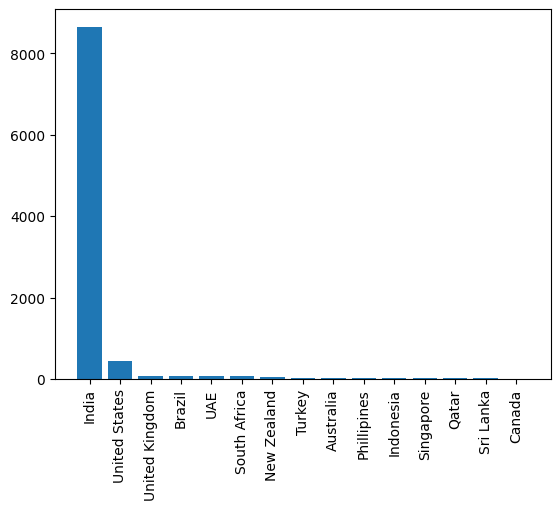

In [17]:
plt.bar(c.index,c.values)
plt.xticks(rotation=90) # For avoiding the cluttering 

([<matplotlib.patches.Wedge at 0x7ff21b5bf280>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

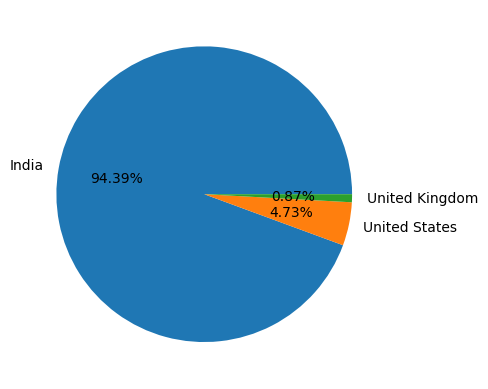

In [18]:
# plt.pie(c.values, labels = c.index)   The Labels will be overlapped
plt.pie(c.values[:3], labels = c.index[:3],labeldistance= 1.1, autopct = '%1.2f%%')    # Hence we will focus on Top 3 
                                                                                        # autopct is percentage

****Top records are India, US and UK ****

# **Group By **

In [19]:
ratings  = final_df.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns = {0: "Rating Count"})

In [20]:
final_df.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns = {0: "Rating Count"})

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


Observations 
* When rating is 4.5 - 4.9 : Excellent 
* When 4.0 - 4.4 : Very Good
* When 3.5 - 3.9 ; Good 
* When 3.0 - 3.4 : Average 
* When 0 - 2.4: 

# **For increasing the figure size in a plot **

* plt.figure(figsize=(14,6))
or 
* plt.rcParams['figure.figsize'] = (12,6)


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

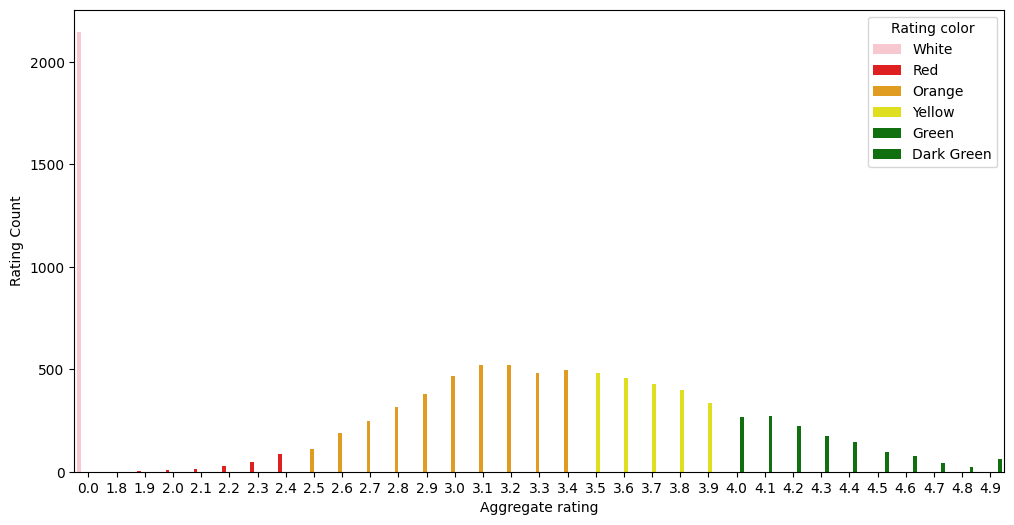

In [21]:
plt.rcParams['figure.figsize'] = (12,6) # For increasing the figure size 

#sns.barplot(x = "Aggregate rating", y = 'Rating Count', data = ratings)
sns.barplot(x = "Aggregate rating", y = 'Rating Count', data = ratings, hue = 'Rating color', palette = ['pink','red','orange','yellow','green','green'])
# for giving the colors as given in rantings, here palette is mapping the color with Rating color 

Observations:
* Majority of people have NOT RATED 
* Maximum number of people who have rated lies between 2.3 - 4.8
* Most of the people have rated Average to Very Good 

<Axes: xlabel='Rating color', ylabel='count'>

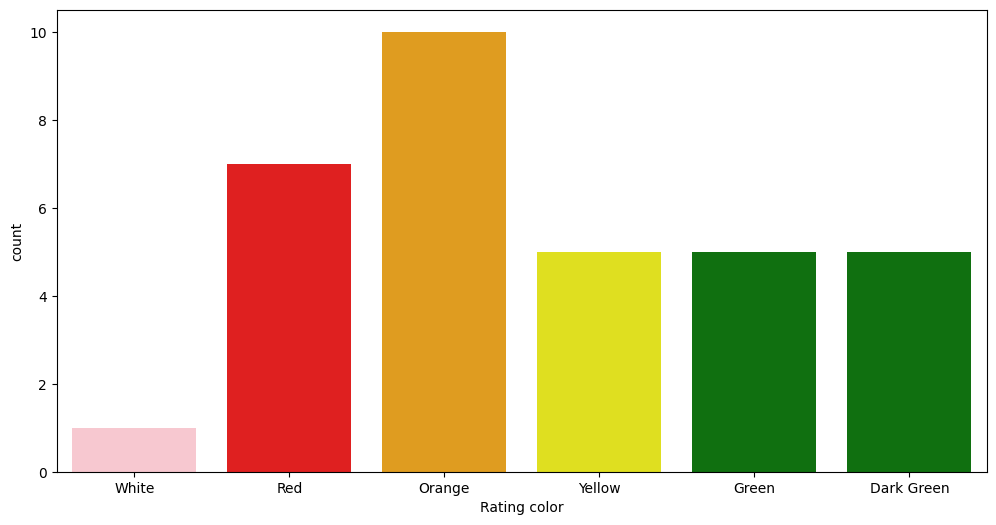

In [29]:
sns.countplot(x = 'Rating color',palette = ['pink','red','orange','yellow','green','green'],data = ratings)
#Countplots are particularly useful for exploring and visualizing the distribution of categorical data, and they can provide insights into how data is distributed across different categories.

# Q. TO FIND COUNTRY NAME WHICH HAVE GIVEN ZERO RATING 

In [43]:
rating_country = final_df.groupby(['Aggregate rating','Country','Rating color', 'Rating text']).size().reset_index().rename(columns = {0: "Rating Count"})

In [45]:
rating_country

,Aggregate rating,Country,Rating color,Rating text,Rating Count
0,0.0,Brazil,White,Not rated,5
1,0.0,India,White,Not rated,2139
2,0.0,United Kingdom,White,Not rated,1
3,0.0,United States,White,Not rated,3
4,1.8,India,Red,Poor,1
...,...,...,...,...,...
217,4.9,Sri Lanka,Dark Green,Excellent,1
218,4.9,Turkey,Dark Green,Excellent,3
219,4.9,UAE,Dark Green,Excellent,4
220,4.9,United Kingdom,Dark Green,Excellent,4


In [50]:
final_df[final_df['Aggregate rating'] == 0.0].groupby('Country').size().reset_index()


,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


**The 4 countries are Brazil, India, UK, US**

In [66]:
final_df.groupby(['Country','Currency']).size().reset_index() # Countries and their Currencies 

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [67]:
final_df.groupby(['Country','Has Online delivery']).size().reset_index()

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


**Observation:** 
* Online Delivery is active in India and UAE
* There are some places in UAE and India where online deliver is not available 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Brazil'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'United States'),
  Text(4, 0, 'New Zealand'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'Sri Lanka'),
  Text(7, 0, 'UAE'),
  Text(8, 0, 'Canada'),
  Text(9, 0, 'Singapore'),
  Text(10, 0, 'Indonesia'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'South Africa'),
  Text(13, 0, 'Turkey'),
  Text(14, 0, 'Phillipines')])

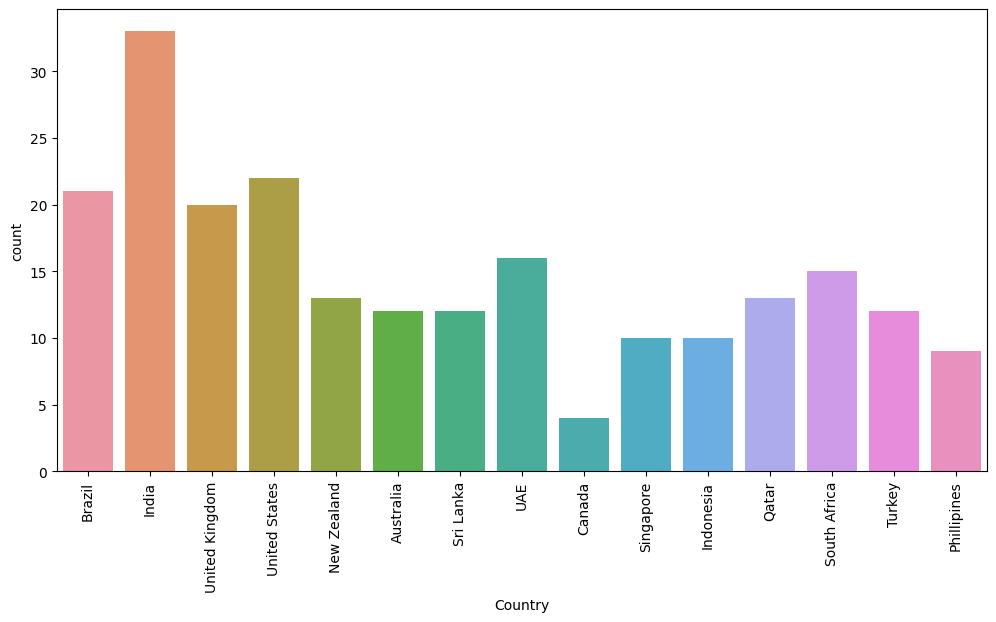

In [51]:
sns.countplot(x='Country',data=rating_country)
plt.xticks(rotation = 90)

In [78]:
city_label = final_df.City.value_counts().index
city_value =  final_df.City.value_counts().values

([<matplotlib.patches.Wedge at 0x7ff213081660>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, ' 68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, ' 14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, ' 13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, ' 3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, ' 0.31%')])

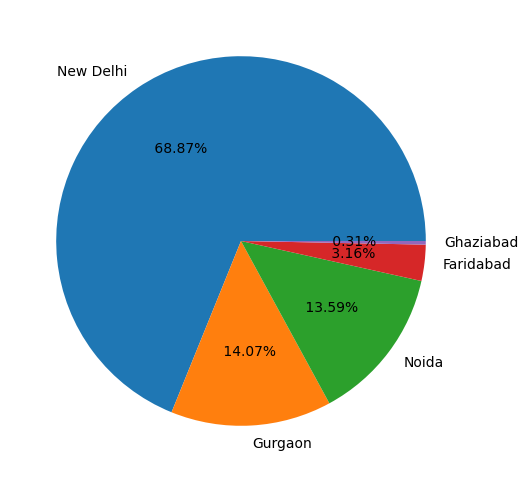

In [86]:
plt.pie(city_value[:5],labels = city_label[:5],autopct =' %1.2f%%')

In [22]:
int64_columns = final_df.select_dtypes(include=['int64']).columns.tolist()
# Extracting the Columns with data types int64 and

In [23]:
print(int64_columns)

['Restaurant ID', 'Country Code', 'Average Cost for two', 'Price range', 'Votes']


# Rough Correlation / Just for the sake of Exploration 

In [24]:
correlation_matrix = final_df[int64_columns].corr()

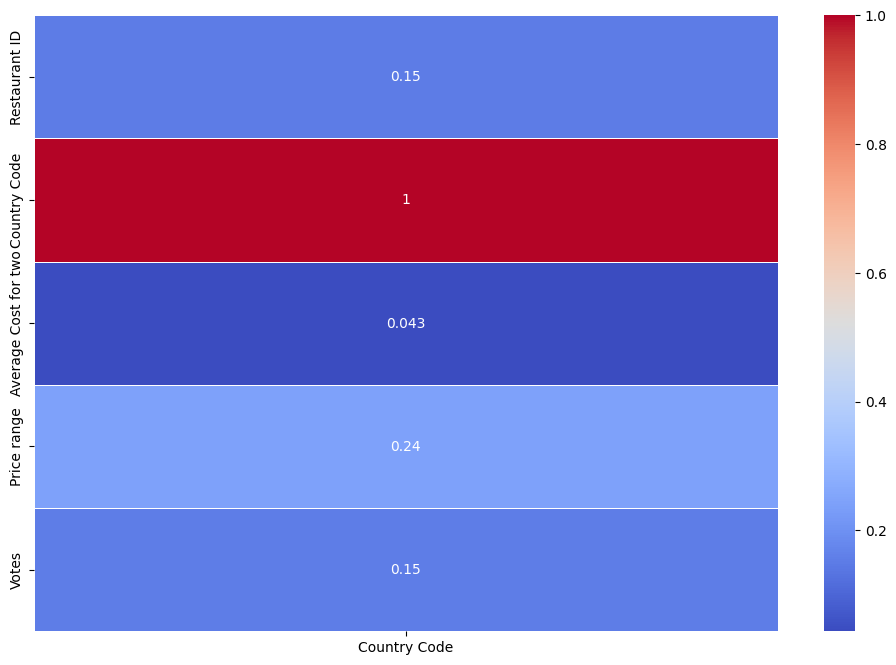

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['Country Code']], annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# Exploration Done ----------